<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/frequentPattern/pyspark/parallelECLAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Frequent Patterns in Big Data Using parallelECLAT Algorithm

In this tutorial, we will discuss the first approach to find frequent patterns in big data using parallelECLAT algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing parallelECLAT on a single dataset at a particular minimum support value</a>

#### Step 0: install required respositories and inputs

##### Step 0.1: Mounting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Step 0.2: Dowloading the transactional dataset

In [2]:
!wget 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

--2023-11-07 01:47:33--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.31.244.160, 150.95.161.176
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.31.244.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M  2.47MB/s    in 1.5s    

2023-11-07 01:47:35 (2.47 MB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



##### Step 0.3: install pami repository

In [3]:
!pip install -U 'pami[spark]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=3f30dc58e0eca879fa1ef26341d2a2e45e9600836570f11f9cf29f22776f4945
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=28098a00e92c8a8e692e813f82c49f87af7a3f2fce6e3b3bdc8d12f1e2b35fb6
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for Jso

#### Step 1: Import the parallelECLAT algorithm

In [4]:
from PAMI.frequentPattern.pyspark import parallelECLAT  as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Transactional_T10I4D100K.csv'

minimumSupportCount=1000  #Users can also specify this constraint between 0 to 1.
mumberWorkersCount=4
seperator='\t'

#### Step 3: Execute the parallelECLAT algorithm

In [6]:
obj = alg.parallelECLAT(iFile=inputFile, minSup=minimumSupportCount,numWorkers=mumberWorkersCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

1000 <class 'int'>
<class 'int'> 1000
Frequent patterns were generated successfully using Parallel ECLAT algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 385


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 36.8269476890564


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 233455616
Memory (USS): 184578048


# Advanced Tutorial on Implementing parallelECLAT Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using parallelECLAT algorithm.


[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the parallelECLAT (parallelECLAT) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the parallelECLAT algorithm and pandas data frame

In [12]:
from PAMI.frequentPattern.pyspark import parallelECLAT  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator = '\t'
mumberWorkersCount = 4
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of parallelECLAT algorithm

#### Step 3: Execute the parallelECLAT algorithm using a for loop

In [14]:
algorithm = 'parallelECLAT'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.parallelECLAT(iFile=inputFile, minSup=minSupCount,numWorkers=mumberWorkersCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


1000 <class 'int'>
<class 'int'> 1000
Frequent patterns were generated successfully using Parallel ECLAT algorithm
1500 <class 'int'>
<class 'int'> 1500
Frequent patterns were generated successfully using Parallel ECLAT algorithm
2000 <class 'int'>
<class 'int'> 2000
Frequent patterns were generated successfully using Parallel ECLAT algorithm
2500 <class 'int'>
<class 'int'> 2500
Frequent patterns were generated successfully using Parallel ECLAT algorithm
3000 <class 'int'>
<class 'int'> 3000
Frequent patterns were generated successfully using Parallel ECLAT algorithm


In [15]:
print(result)

       algorithm  minSup  patterns    runtime     memory
0  parallelECLAT    1000       385  28.269921  235630592
1  parallelECLAT    1500       237  15.832149  217755648
2  parallelECLAT    2000       155  13.582235  204853248
3  parallelECLAT    2500       107  12.561791  201437184
4  parallelECLAT    3000        60   9.613751  199581696


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

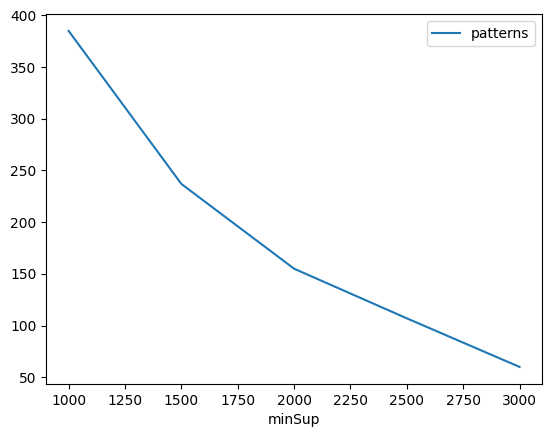

Graph for No Of Patterns is successfully generated!


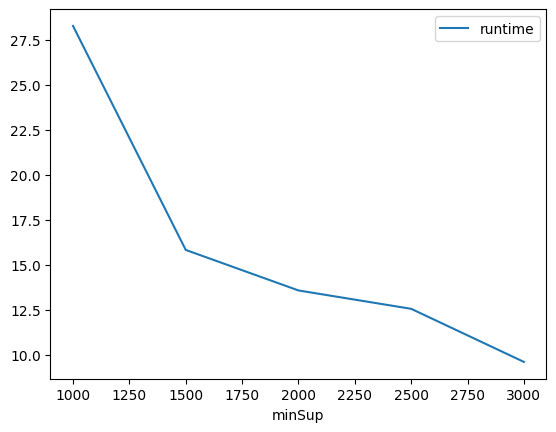

Graph for Runtime taken is successfully generated!


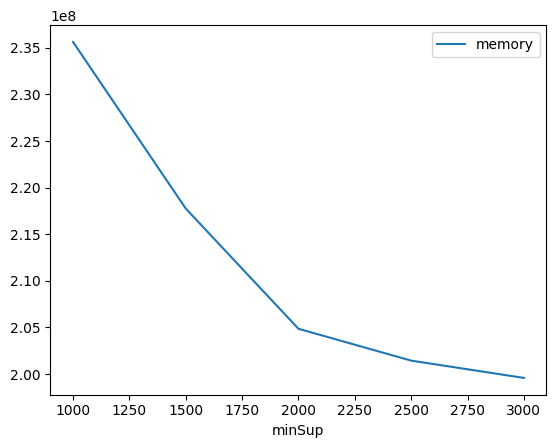

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
